# Visualizing networks of astronauts
Using networkx and Bokeh

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('astronauts.csv')

In [4]:
df.head()

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Cumulative hours of space flight time
0,"Carpenter, M. Scott",1959,1,1,Former,Military,Male,"Commander, US Navy (Retired)",5/1/1925,NaN,Mercury 7,4
1,"Williams, Clifton C., Jr.",1963,3,0,Deceased,Military,Male,"Major, US Marine Corps",9/26/1932,NaN,NaN,0
2,"Worden, Alfred M.",1966,5,1,Former,Military,Male,"Colonel, US Air Force",2/7/1932,NaN,Apollo 15,295
3,"Williams, Donald E.",1978,8,2,Former,Military,Male,"Captain, US Navy",2/13/1942,NaN,STS 51-D and STS-34,287
4,"Wilcutt, Terrence W.",1990,13,4,Current,Military,Male,"Colonel, US Marine Corps (Retired)",10/31/1949,Pilot,"STS-68, STS-79, STS-89 and STS-106",1007


In [5]:
#Mercury, Apollo, STS, Soyuz, Gemini
df['Missions flown'].unique()

array(['Mercury 7', nan, 'Apollo 15', 'STS 51-D and STS-34',
       'STS-68, STS-79, STS-89 and STS-106',
       'STS-57, STS-68, STS-81 and STS-92',
       'STS-58, NASA-MIR 6 and STS-112',
       'STS-111/Exp 5/STS-113 and Soyuz TMA-11',
       'STS-101, Exp 13 and Soyuz TMA-16', 'STS-121, STS-120 and STS-131',
       'STS-116', 'STS-129', 'Mercury 9 and Gemini 5',
       'Mercury 6 and STS-95', 'Mercury 4 and Gemini 3',
       'Mercury 8, Gemini 6 and Apollo 7', 'Mercury 3 and Apollo 14',
       'Apollo-Soyuz Test Project', 'Gemini 8 and Apollo 11',
       'Gemini 7 and Apollo 8',
       'Gemini 5, Gemini 11, Apollo 12 and Skylab 2',
       'Gemini 7, Gemini 12, Apollo 8 and Apollo 13',
       'Gemini 4 and Apollo 9',
       'Gemini 6, Gemini 9, Apollo 10 and Apollo-Soyuz Test Project',
       'Gemini 4',
       'Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS-1 and STS-9',
       'Gemini 12 and Apollo 11', 'Apollo 8', 'Apollo 12 and Skylab 3',
       'Gemini 9, Apollo 10 and Apollo 

In [6]:
list(df.columns)

['Astronaut ',
 'Selection Year',
 ' Group',
 ' # Flights ',
 'Status ',
 'Military or civilian',
 'Gender',
 'If military include details',
 'Date of birth',
 'Job',
 'Missions flown',
 'Cumulative hours of space flight time']

In [7]:
import re
all_missions_for_all_astronauts = []
for index, row in df.iterrows():
    as_str = str(row['Missions flown'])
    as_str = as_str.strip()
    as_str = as_str.replace("and", ",")
    new_str = re.split(",", as_str)
    for j in new_str:
        all_missions_for_all_astronauts.append({'name': row['Astronaut '],
                                            'selection_year': row['Selection Year'],
                                            'group': row[' Group'],
                                            'num_flights': row[' # Flights '],
                                            'status': row['Status '],
                                            'gender': row['Gender'],
                                            'hours': row['Cumulative hours of space flight time'],
                                            'mission': j
                                           })

In [8]:
all_missions = pd.DataFrame(all_missions_for_all_astronauts)

In [11]:
all_missions.head(n=2)

,gender,group,hours,mission,name,num_flights,selection_year,status
0,Male,1,4,Mercury 7,"Carpenter, M. Scott",1,1959,Former
1,Male,3,0,nan,"Williams, Clifton C., Jr.",0,1963,Deceased


In [ ]:
#all_missions = all_missions[all_missions['mission'] != 'nan']

In [12]:
all_missions = all_missions.sort_values('mission')

In [13]:
all_missions.head(n=5)

,gender,group,hours,mission,name,num_flights,selection_year,status
75,Male,2,835,Apollo 10,"Young, John W.",6,1962,Former
86,Male,3,566,Apollo 10,"Cernan, Eugene A.",3,1963,Former
70,Male,2,507,Apollo 10,"Stafford, Thomas P.",4,1962,Former
90,Male,3,266,Apollo 11,"Collins, Michael",2,1963,Former
80,Male,3,289,Apollo 11,"Aldrin, Buzz",2,1963,Former


In [14]:
all_missions.shape

(814, 8)

In [16]:
reshape = []

In [17]:
# Very costly operations
for i, j in all_missions.iterrows():
    for _, k in all_missions.iterrows():
        if (j['name'] == k['name']):
            pass
        elif j['mission'] == 'nan':
            reshape.append({'name1': j['name'],
                            'name2': j['name'],
                            'mission': "None"})
        elif (j['mission'] == k['mission']):
            reshape.append({'name1': j['name'],
                            'name2': k['name'],
                            'mission': j['mission']})
        else:
            pass

In [18]:
ndf = pd.DataFrame(reshape)

In [19]:
ndf.head(n=5)

,mission,name1,name2
0,Apollo 10,"Cernan, Eugene A.","Stafford, Thomas P."
1,Apollo 10,"Stafford, Thomas P.","Cernan, Eugene A."
2,Apollo 11,"Collins, Michael","Aldrin, Buzz"
3,Apollo 11,"Collins, Michael","Armstrong, Neil A."
4,Apollo 11,"Aldrin, Buzz","Collins, Michael"


In [20]:
import networkx as nx

In [21]:
#'from_pandas_dataframe' was removed in 2-2.
g = nx.from_pandas_edgelist(ndf, source='name1', target='name2') 
nx.draw(g)

/Users/cenchen/repos/tubeanalysis/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


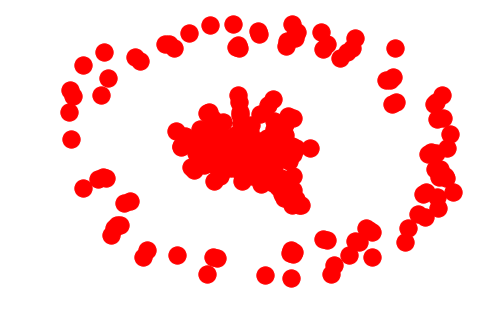

In [22]:
nx.draw(g)

In [23]:
# Make a list of the missions, we'll use it later
missions = list(ndf.mission.unique())
#missions

In [24]:
# Make a list of the astronauts, we'll use it later
people = list(ndf.name1.unique())
#people

In [ ]:
#dict(zip(missions, missions))

In [ ]:
#people

In [27]:
g.degree("Aldrin, Buzz ")

2

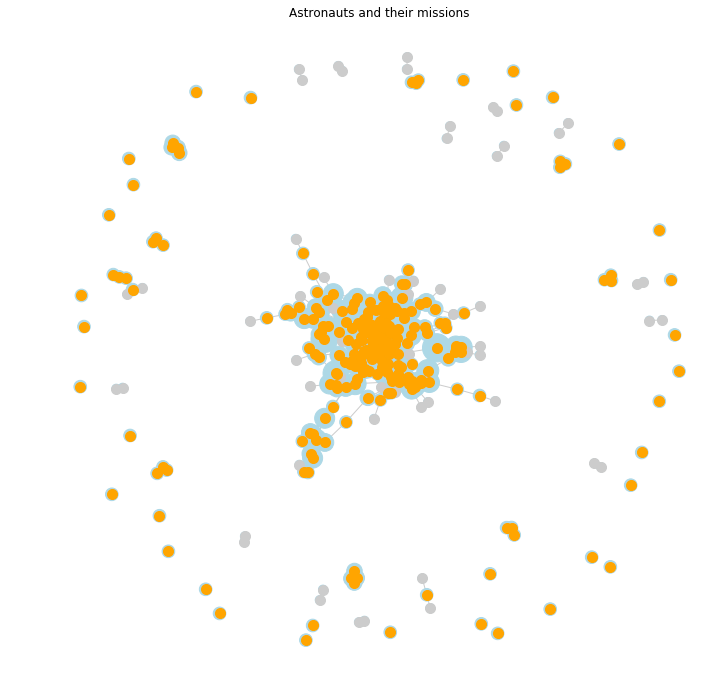

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(ndf, source='name1', target='name2', edge_attr='name1') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g, iterations=50)

# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

size = [g.degree(name) * 80 for name in people]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=people, 
                       node_size=size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=people, node_color='#cccccc', node_size=100)

# Draw POPULAR PEOPLE
popular_people = [person for person in people if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

#node_labels = dict(zip(people, people))
#nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Astronauts and their missions")

# 5. Tell matplotlib to show it
plt.show()

In [29]:
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, WheelZoomTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

TOOLTIPS = [
    ("name", "@name1"),
]

plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "U.S. Astronauts"

plot.add_tools(HoverTool(tooltips=TOOLTIPS), TapTool(), BoxSelectTool(), WheelZoomTool())

graph_renderer = from_networkx(g, nx.spring_layout, scale=1, center=(0,0))
# Manipulating the nodes themselves
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])
# Manipulating their connections
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()


plot.renderers.append(graph_renderer)


output_file("interactive_graphs.html")
show(plot)

In [ ]:
# x, y = zip(*graph_renderer.layout_provider.graph_layout.values())
# node_labels = [p[0] for p in list(g.nodes(data=True))]
# source = ColumnDataSource({'x': x, 'y': y,
#                            'people': [node_labels[i] for i in range(len(x))]})
# labels = LabelSet(x='x', y='y', source=source,
#                   background_fill_color='white')
# plot.renderers.append(labels)
